In [3]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

In [4]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata('data.sfgov.org', None)

# Get all results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get('5cei-gny5', limit=50000)

columns_to_remove = [
    ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv', ':@computed_region_26cr_cadq',
    ':@computed_region_ajp5_b2md', ':@computed_region_fyvs_ahh9', ':@computed_region_p5aj_wyqh',
    ':@computed_region_rxqg_mtj9', ':@computed_region_yftq_j783', ':@computed_region_bh8s_q3mv',
    ':@computed_region_6pnf_4xz7', ':@computed_region_jwn9_ihcz', ':@computed_region_pigm_ib2e',
    ':@computed_region_9jxd_iqea', ':@computed_region_6ezc_tdp2', ':@computed_region_h4ep_8xdi'
]

# Convert to pandas DataFrame
ev_df = pd.DataFrame.from_records(results).drop(columns=columns_to_remove)

# Convert file_date to datetime
ev_df['file_date'] = pd.to_datetime(ev_df['file_date'])

ev_df['eviction_type'] = ev_df.iloc[:, 6:25].apply(lambda x: ', '.join(x.index[x]), axis=1)

In [5]:
# Show columns and data types
print(ev_df.dtypes)

eviction_id                        object
address                            object
city                               object
state                              object
zip                                object
file_date                  datetime64[ns]
non_payment                          bool
breach                               bool
nuisance                             bool
illegal_use                          bool
failure_to_sign_renewal              bool
access_denial                        bool
unapproved_subtenant                 bool
owner_move_in                        bool
demolition                           bool
capital_improvement                  bool
substantial_rehab                    bool
ellis_act_withdrawal                 bool
condo_conversion                     bool
roommate_same_unit                   bool
other_cause                          bool
late_payments                        bool
lead_remediation                     bool
development                       

<Axes: title={'center': 'Evictions by Year'}, xlabel='file_date', ylabel='Number of Evictions'>

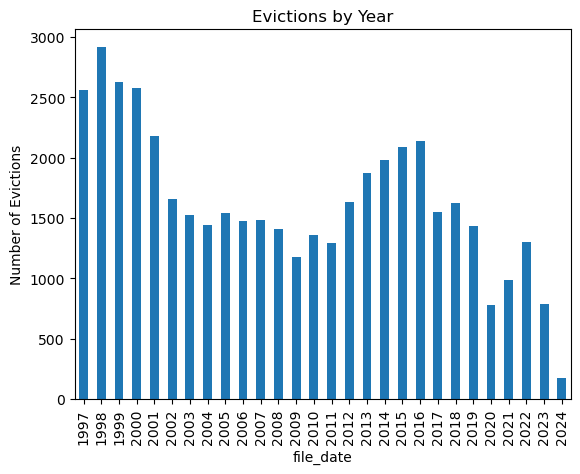

In [6]:
# Plot overall evictions by year
plt.title('Evictions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.year.value_counts().sort_index().plot(kind='bar')

<Axes: title={'center': 'Evictions by Month'}, xlabel='file_date', ylabel='Number of Evictions'>

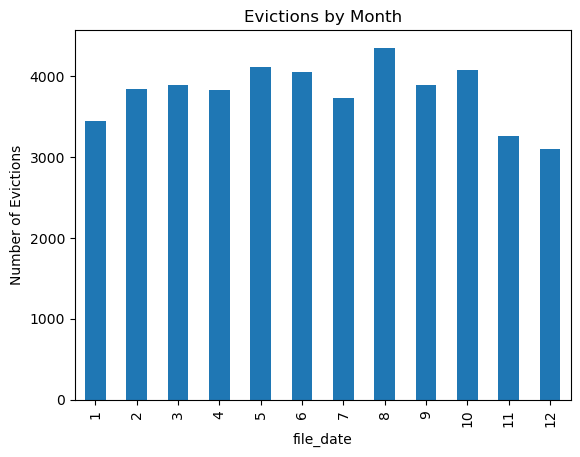

In [6]:
# Plot overall evictions by month
plt.figure()
plt.title('Evictions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.month.value_counts().sort_index().plot(kind='bar')

<Axes: title={'center': 'Evictions by Day of Week'}, xlabel='file_date', ylabel='Number of Evictions'>

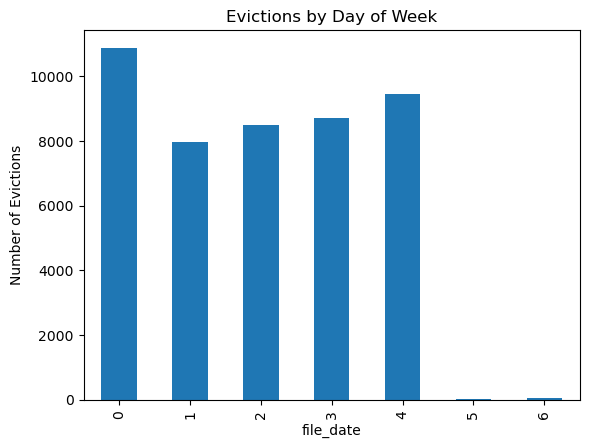

In [7]:
# Plot overall evictions by day of week
plt.figure()
plt.title('Evictions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='eviction_type'>

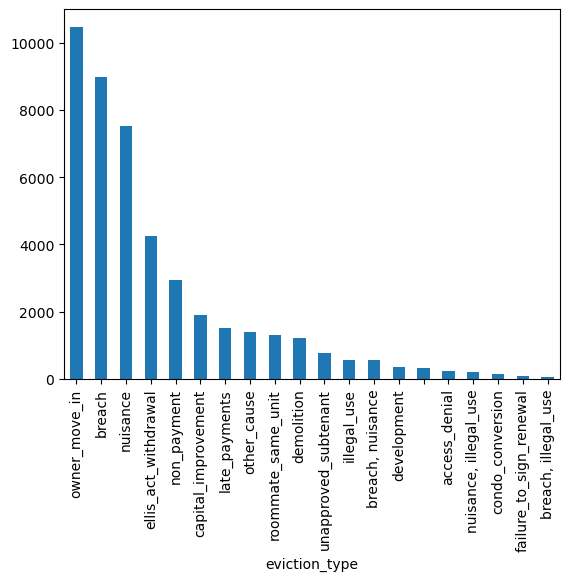

In [8]:
# Get top 10 eviction types
ev_df['eviction_type'].value_counts().head(20).plot(kind='bar')


<Axes: title={'center': 'Evictions by Zip Code'}, xlabel='zip', ylabel='Number of Evictions'>

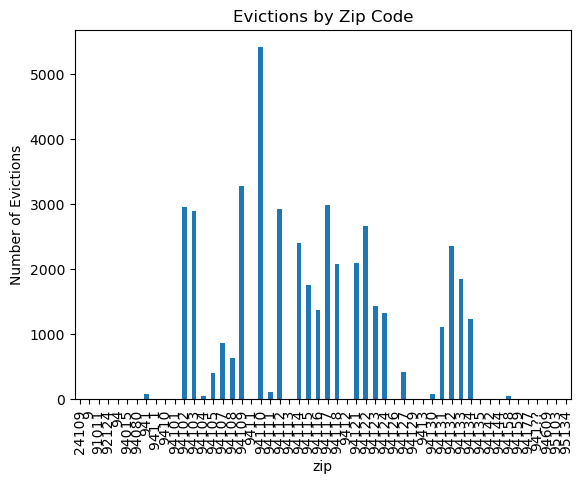

In [9]:
# Plot distribution of evictions by zip code
plt.figure()
plt.title('Evictions by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Evictions')
ev_df['zip'].value_counts().sort_index().plot(kind='bar')

<Axes: title={'center': 'Evictions by Neighborhood'}, xlabel='neighborhood', ylabel='Number of Evictions'>

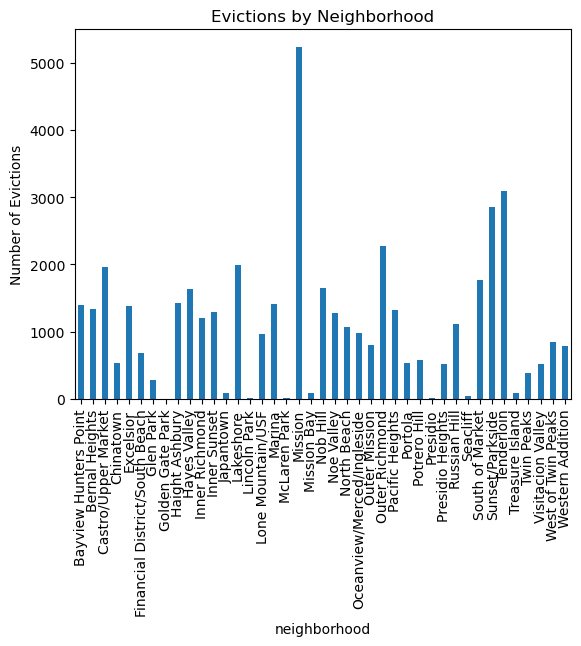

In [10]:
# Plot distribution of evictions by neighborhood
plt.figure()
plt.title('Evictions by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Evictions')
ev_df['neighborhood'].value_counts().sort_index().plot(kind='bar')

In [7]:
coordinates = ev_df[ev_df['shape'].notnull()].reset_index(drop=True)['shape'].str['coordinates']
coordinates = gpd.points_from_xy([x[0] for x in coordinates], [x[1] for x in coordinates], crs='EPSG:4326')

/Users/brianliu03/miniconda3/envs/sfevictions/lib/python3.8/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/brianliu03/miniconda3/envs/sfevictions/lib/python3.8/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/brianliu03/miniconda3/envs/sfevictions/lib/python3.8/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/brianliu03/miniconda3/envs/sfevictions/lib/python3.8/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/brianliu03/miniconda3/envs/sfevictions/lib/python3.8/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


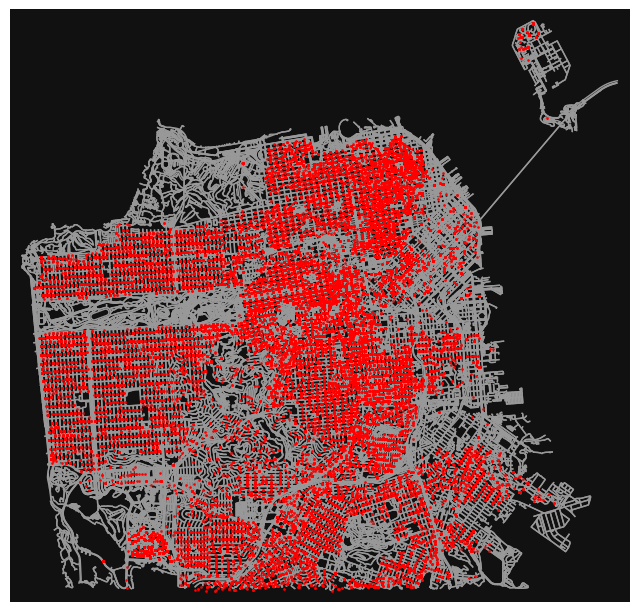

In [16]:
# Load map of San Francisco
sf = ox.graph_from_place('San Francisco, California')

# Plot the map
fig, ax = ox.plot_graph(sf, node_size=0, show=False, close=False)

# Plot the evictions
gdf = gpd.GeoDataFrame(geometry=coordinates)
gdf.plot(ax=ax, color='red', markersize=0.8)

plt.show()